In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
happiness_df = pd.read_csv('Resources/Gallup2018.csv')
nationalparks_df = pd.read_csv('Resources/StatesRanked_NationalParkCoverage.csv')

In [3]:
happiness_df.head()

,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical
0,Hawaii,502,64.6,1,1,1,1,4,4
1,Wyoming,219,64.2,2,3,18,6,1,3
2,Alaska,212,63.9,3,5,8,2,23,1
3,Montana,488,63.5,4,4,19,17,2,7
4,Utah,1214,63.4,5,2,4,13,9,14


In [4]:
# Checking Columns
# print(happiness_df.columns.tolist())

In [5]:
nationalparks_df.head()

,STATE,Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered,Unnamed: 11,Unnamed: 12
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14,NaN,NaN
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10,NaN,NaN
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16,NaN,NaN
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49,NaN,NaN
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02,NaN,NaN


In [6]:
# Checking Columns 
# print(nationalparks_df.columns.tolist())

In [7]:
# Cleaning datasets
happiness_df = happiness_df.drop(columns=['2018 sample size', 'Career', 'Social', 'Financial', 'Community', 'Physical'])
nationalparks_df = nationalparks_df.rename(columns={'STATE ': 'State'})
nationalparks_df = nationalparks_df.drop(columns=['Unnamed: 11', 'Unnamed: 12'])

nationalparks_df.head()

,State,Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02


In [13]:
# Merging DataFrames

merge_df = pd.merge(nationalparks_df, happiness_df, on="State")
merge_df.head()

,State,Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered,Well-Being Index,Well-Being Index Rank
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,"48,000",0.14,59.9,44
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,"35,826,051",9.10,63.9,3
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,"1,574,753",2.16,62.1,15
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,"7,613,164",7.49,62.2,14
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,"676,414",1.02,63.4,6


In [16]:
# Cleaning Merged Data

merge_df['Total Acreage'] = merge_df['Total Acreage'].str.replace(',','')
merge_df.head()

,State,Rank,State Size (acres),Number of State Parks,# of State Parks (acres),State Coverage of State Parks,Number of National Parks,State Coverage of National Parks (acres),State Coverage of National Parks,Total Acreage,Percent Covered,Well-Being Index,Well-Being Index Rank
0,Alabama,46,"33,432,000",22,"48,000",0.14,0,0,0.00,48000,0.14,59.9,44
1,Alaska,2,"393,747,000",119,"3,300,000",0.84,8,"32,526,051",8.26,35826051,9.10,63.9,3
2,Arizona,12,"72,964,000",36,"60,000",0.08,3,"1,514,753",2.08,1574753,2.16,62.1,15
3,California,3,"101,676,000",270,"1,300,000",1.28,9,"6,313,164",6.21,7613164,7.49,62.2,14
4,Colorado,25,"66,624,000",43,"220,000",0.33,4,"456,414",0.69,676414,1.02,63.4,6


In [19]:
merge_df["Total Acreage"] = merge_df["Total Acreage"].astype('float')

In [27]:
merge_df.columns

Index(['State', 'Rank', 'State Size (acres)', 'Number of State Parks',
       '# of State Parks (acres)', 'State Coverage of State Parks',
       'Number of National Parks', 'State Coverage of National Parks (acres)',
       'State Coverage of National Parks', 'Total Acreage', 'Percent Covered ',
       'Well-Being Index', 'Well-Being Index Rank'],
      dtype='object')

The correlation between Number of State Parks and Well-Being Index is 0.08


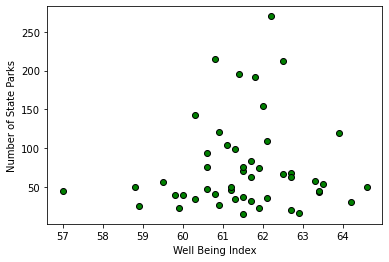

In [31]:
# Linear Regression Model fx 1

equation = linregress(merge_df["Well-Being Index"], merge_df["Number of State Parks"])

# Fx 2
plt.scatter(merge_df["Well-Being Index"], merge_df["Number of State Parks"], facecolor="green", edgecolor="black")
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(merge_df["Well-Being Index"], merge_df["Number of State Parks"])
print(f"The correlation between Number of State Parks and Well-Being Index is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Well Being Index")
plt.ylabel("Number of State Parks")
plt.title("")
# plt.savefig("")
plt.show()